# Вариант 2. Показатели сердечных заболеваний

Этот датасет представляет собой данные, собранные в ходе ежегодного опроса CDC о состоянии здоровья более 400 тысяч взрослых в США. Он включает информацию о различных факторах риска сердечных заболеваний, таких как гипертония, высокий уровень холестерина, курение, диабет, ожирение, недостаток физической активности и злоупотребление алкоголем. Также содержатся данные о состоянии здоровья респондентов, наличии хронических заболеваний (например, диабет, артрит, астма), уровне физической активности, психологическом здоровье, а также о социальных и демографических характеристиках, таких как пол, возраст, этническая принадлежность и место проживания. Датасет предоставляет информацию, которая может быть использована для анализа и предсказания риска сердечных заболеваний, а также для разработки программ профилактики и улучшения общественного здоровья.

## Бизнес-цель

Разработка и внедрение модели машинного обучения для кластеризации пациентов на основе данных об их здоровье с целью выявления групп с повышенным риском сердечно-сосудистых заболеваний (ССЗ), таких как инфаркты и сердечная недостаточность. Это позволит оптимизировать профилактические меры, улучшить управление ресурсами медицинских учреждений и создать эффективные программы долгосрочного наблюдения.

### Основные аспекты бизнес-цели:

1. **Раннее выявление и профилактика сердечно-сосудистых заболеваний:**
   - **Цель:** Использование модели машинного обучения для идентификации пациентов с высоким риском ССЗ на ранних стадиях.
   - **Преимущества:** Возможность своевременного вмешательства и реализации профилактических мер, таких как улучшение питания, повышение физической активности и управление стрессом.
   - **Результат:** Снижение числа случаев инфарктов и сердечной недостаточности за счет превентивных мероприятий.

2. **Оптимизация работы кардиологических центров:**
   - **Цель:** Эффективное распределение ресурсов (кардиологов, оборудования, диагностических тестов) на основе кластеризации пациентов по уровню риска.
   - **Преимущества:** Более рациональное использование ресурсов, снижение времени ожидания для пациентов с высоким риском и улучшение качества обслуживания.
   - **Результат:** Повышение эффективности работы кардиологических центров и улучшение клинических исходов.

3. **Создание персонализированных программ наблюдения:**
   - **Цель:** Разработка долгосрочных программ мониторинга и раннего вмешательства для пациентов с повышенным риском ССЗ.
   - **Преимущества:** Персонализированный подход к наблюдению, учитывающий уникальные характеристики и потребности каждой группы пациентов.
   - **Результат:** Регулярный мониторинг состояния здоровья пациентов и своевременное проведение лечебных мероприятий для предотвращения осложнений.

4. **Улучшение клинических и экономических показателей:**
   - **Цель:** Снижение затрат на лечение сердечно-сосудистых заболеваний за счет раннего выявления и профилактики.
   - **Преимущества:** Уменьшение количества дорогостоящих госпитализаций и операций, повышение общей эффективности системы здравоохранения.
   - **Результат:** Значительное сокращение расходов на лечение ССЗ и улучшение финансовых показателей медицинских учреждений.

5. **Повышение уровня удовлетворенности пациентов:**
   - **Цель:** Обеспечение пациентов качественными медицинскими услугами и персонализированным уходом.
   - **Преимущества:** Повышение доверия к медицинским учреждениям, улучшение общего самочувствия и качества жизни пациентов.
   - **Результат:** Высокий уровень удовлетворенности пациентов и их активное участие в программах профилактики и мониторинга.

Таким образом, разработка модели машинного обучения для кластеризации пациентов с проблемами сердечно-сосудистой системы позволит не только улучшить клинические и экономические показатели, но и повысить уровень удовлетворенности пациентов, обеспечивая им качественную и своевременную медицинскую помощь.

In [78]:
from typing import Any, List
import math 
import pandas as pd
from pandas import DataFrame, Series
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 34

In [79]:
df = pd.read_csv('csv\\heart_2022_no_nans.csv')

df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

count       mean        std    min    25%    50%  \
PhysicalHealthDays  246022.0   4.119026   8.405844   0.00   0.00   0.00   
MentalHealthDays    246022.0   4.167140   8.102687   0.00   0.00   0.00   
SleepHours          246022.0   7.021331   1.440681   1.00   6.00   7.00   
HeightInMeters      246022.0   1.705150   0.106654   0.91   1.63   1.70   
WeightInKilograms   246022.0  83.615179  21.323156  28.12  68.04  81.65   
BMI                 246022.0  28.668136   6.513973  12.02  24.27  27.46   

                      75%     max  
PhysicalHealthDays   3.00   30.00  
MentalHealthDays     4.00   30.00  
SleepHours           8.00   24.00  
HeightInMeters       1.78    2.41  
WeightInKilograms   95.25  292.57  
BMI                 31.89   97.65

In [80]:
def get_null_columns_info(df: DataFrame) -> DataFrame:
    """
    Возвращает информацию о пропущенных значениях в колонках датасета
    """
    w = []
    df_len = len(df)

    for column in df.columns:
        column_nulls = df[column].isnull()
        w.append([column, column_nulls.any(), column_nulls.sum() / df_len])

    null_df = DataFrame(w).rename(columns={0: "Column", 1: "Has Null", 2: "Null Percent"})

    return null_df

In [81]:
get_null_columns_info(df)

Column  Has Null  Null Percent
0                       State     False           0.0
1                         Sex     False           0.0
2               GeneralHealth     False           0.0
3          PhysicalHealthDays     False           0.0
4            MentalHealthDays     False           0.0
5             LastCheckupTime     False           0.0
6          PhysicalActivities     False           0.0
7                  SleepHours     False           0.0
8                RemovedTeeth     False           0.0
9              HadHeartAttack     False           0.0
10                  HadAngina     False           0.0
11                  HadStroke     False           0.0
12                  HadAsthma     False           0.0
13              HadSkinCancer     False           0.0
14                    HadCOPD     False           0.0
15      HadDepressiveDisorder     False           0.0
16           HadKidneyDisease     False           0.0
17               HadArthritis     False           0.0
18                HadDiabetes     False           0.0
19        DeafOrHardOfHearing     False           0.0
20    BlindOrVisionDifficulty     False           0.0
21    DifficultyConcentrating     False           0.0
22          DifficultyWalking     False           0.0
23  DifficultyDressingBathing     False           0.0
24          DifficultyErrands     False           0.0
25               SmokerStatus     False           0.0
26            ECigaretteUsage     False           0.0
27                  ChestScan     False           0.0
28      RaceEthnicityCategory     False           0.0
29                AgeCategory     False           0.0
30             HeightInMeters     False           0.0
31          WeightInKilograms     False           0.0
32                        BMI     False           0.0
33            AlcoholDrinkers     False           0.0
34                 HIVTesting     False           0.0
35               FluVaxLast12     False           0.0
36              PneumoVaxEver     False           0.0
37          TetanusLast10Tdap     False           0.0
38           HighRiskLastYear     False           0.0
39                   CovidPos     False           0.0

In [82]:
def get_filtered_columns(df: DataFrame, no_numeric=False, no_text=False) -> list[str]:
    """
    Возвращает список колонок по фильтру
    """
    w = []
    for column in df.columns:
        if no_numeric and pd.api.types.is_numeric_dtype(df[column]):
            continue
        if no_text and not pd.api.types.is_numeric_dtype(df[column]):
            continue
        w.append(column)
    return w

## Визуализация взаимосвязей

In [83]:
num_columns = get_filtered_columns(df, no_text=True)

num_columns

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

Признак BMI зависит от признаков HeightInMeters и WeightInKilograms, так что смысла использовать HeightInMeters и WeightInKilograms нет, исключим их и оставим только BMI 

In [84]:
columns_to_drop = [
    'HeightInMeters',
    'WeightInKilograms'
]

for col in columns_to_drop:
    if col in num_columns:
        num_columns.remove(col)

print('Колонки для визулизации:')
print(num_columns)

Колонки для визулизации:
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI']


In [85]:
def draw_data_2d(
    df: pd.DataFrame,
    col1: int,
    col2: int,
    y: List | None = None,
    classes: List | None = None,
    subplot: Any | None = None,
):
    ax = None
    if subplot is None:
        _, ax = plt.subplots()
    else:
        ax = subplot
    scatter = ax.scatter(df[df.columns[col1]], df[df.columns[col2]], c=y, cmap="viridis", alpha=0.7)
    ax.set(xlabel=df.columns[col1], ylabel=df.columns[col2])
    if classes is not None:
        ax.legend(scatter.legend_elements()[0], classes, loc="lower right", title="Classes")

In [86]:
def show_scatters_by_pairs(
        df: DataFrame,
        columns: List[str],
        y: List = None,
        y_names: List[str] = None) -> None:
    pairs_count = math.comb(len(columns), 2)
    plot_columns_count = 2
    plot_rows_count = math.ceil(pairs_count / plot_columns_count) 

    plt.figure(figsize=(plot_columns_count * 8, plot_rows_count * 8))

    count = 0
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            count += 1
            print(columns[i], 'vs', columns[j])
            draw_data_2d(
                df,
                i, j,
                y,
                y_names,
                subplot=plt.subplot(plot_rows_count, plot_columns_count, count)
            )

    plt.tight_layout()
    plt.show()

PhysicalHealthDays vs MentalHealthDays
PhysicalHealthDays vs SleepHours
PhysicalHealthDays vs BMI
MentalHealthDays vs SleepHours
MentalHealthDays vs BMI
SleepHours vs BMI


C:\Users\ns.potapov\AppData\Local\Temp\ipykernel_52300\1030510231.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(df[df.columns[col1]], df[df.columns[col2]], c=y, cmap="viridis", alpha=0.7)


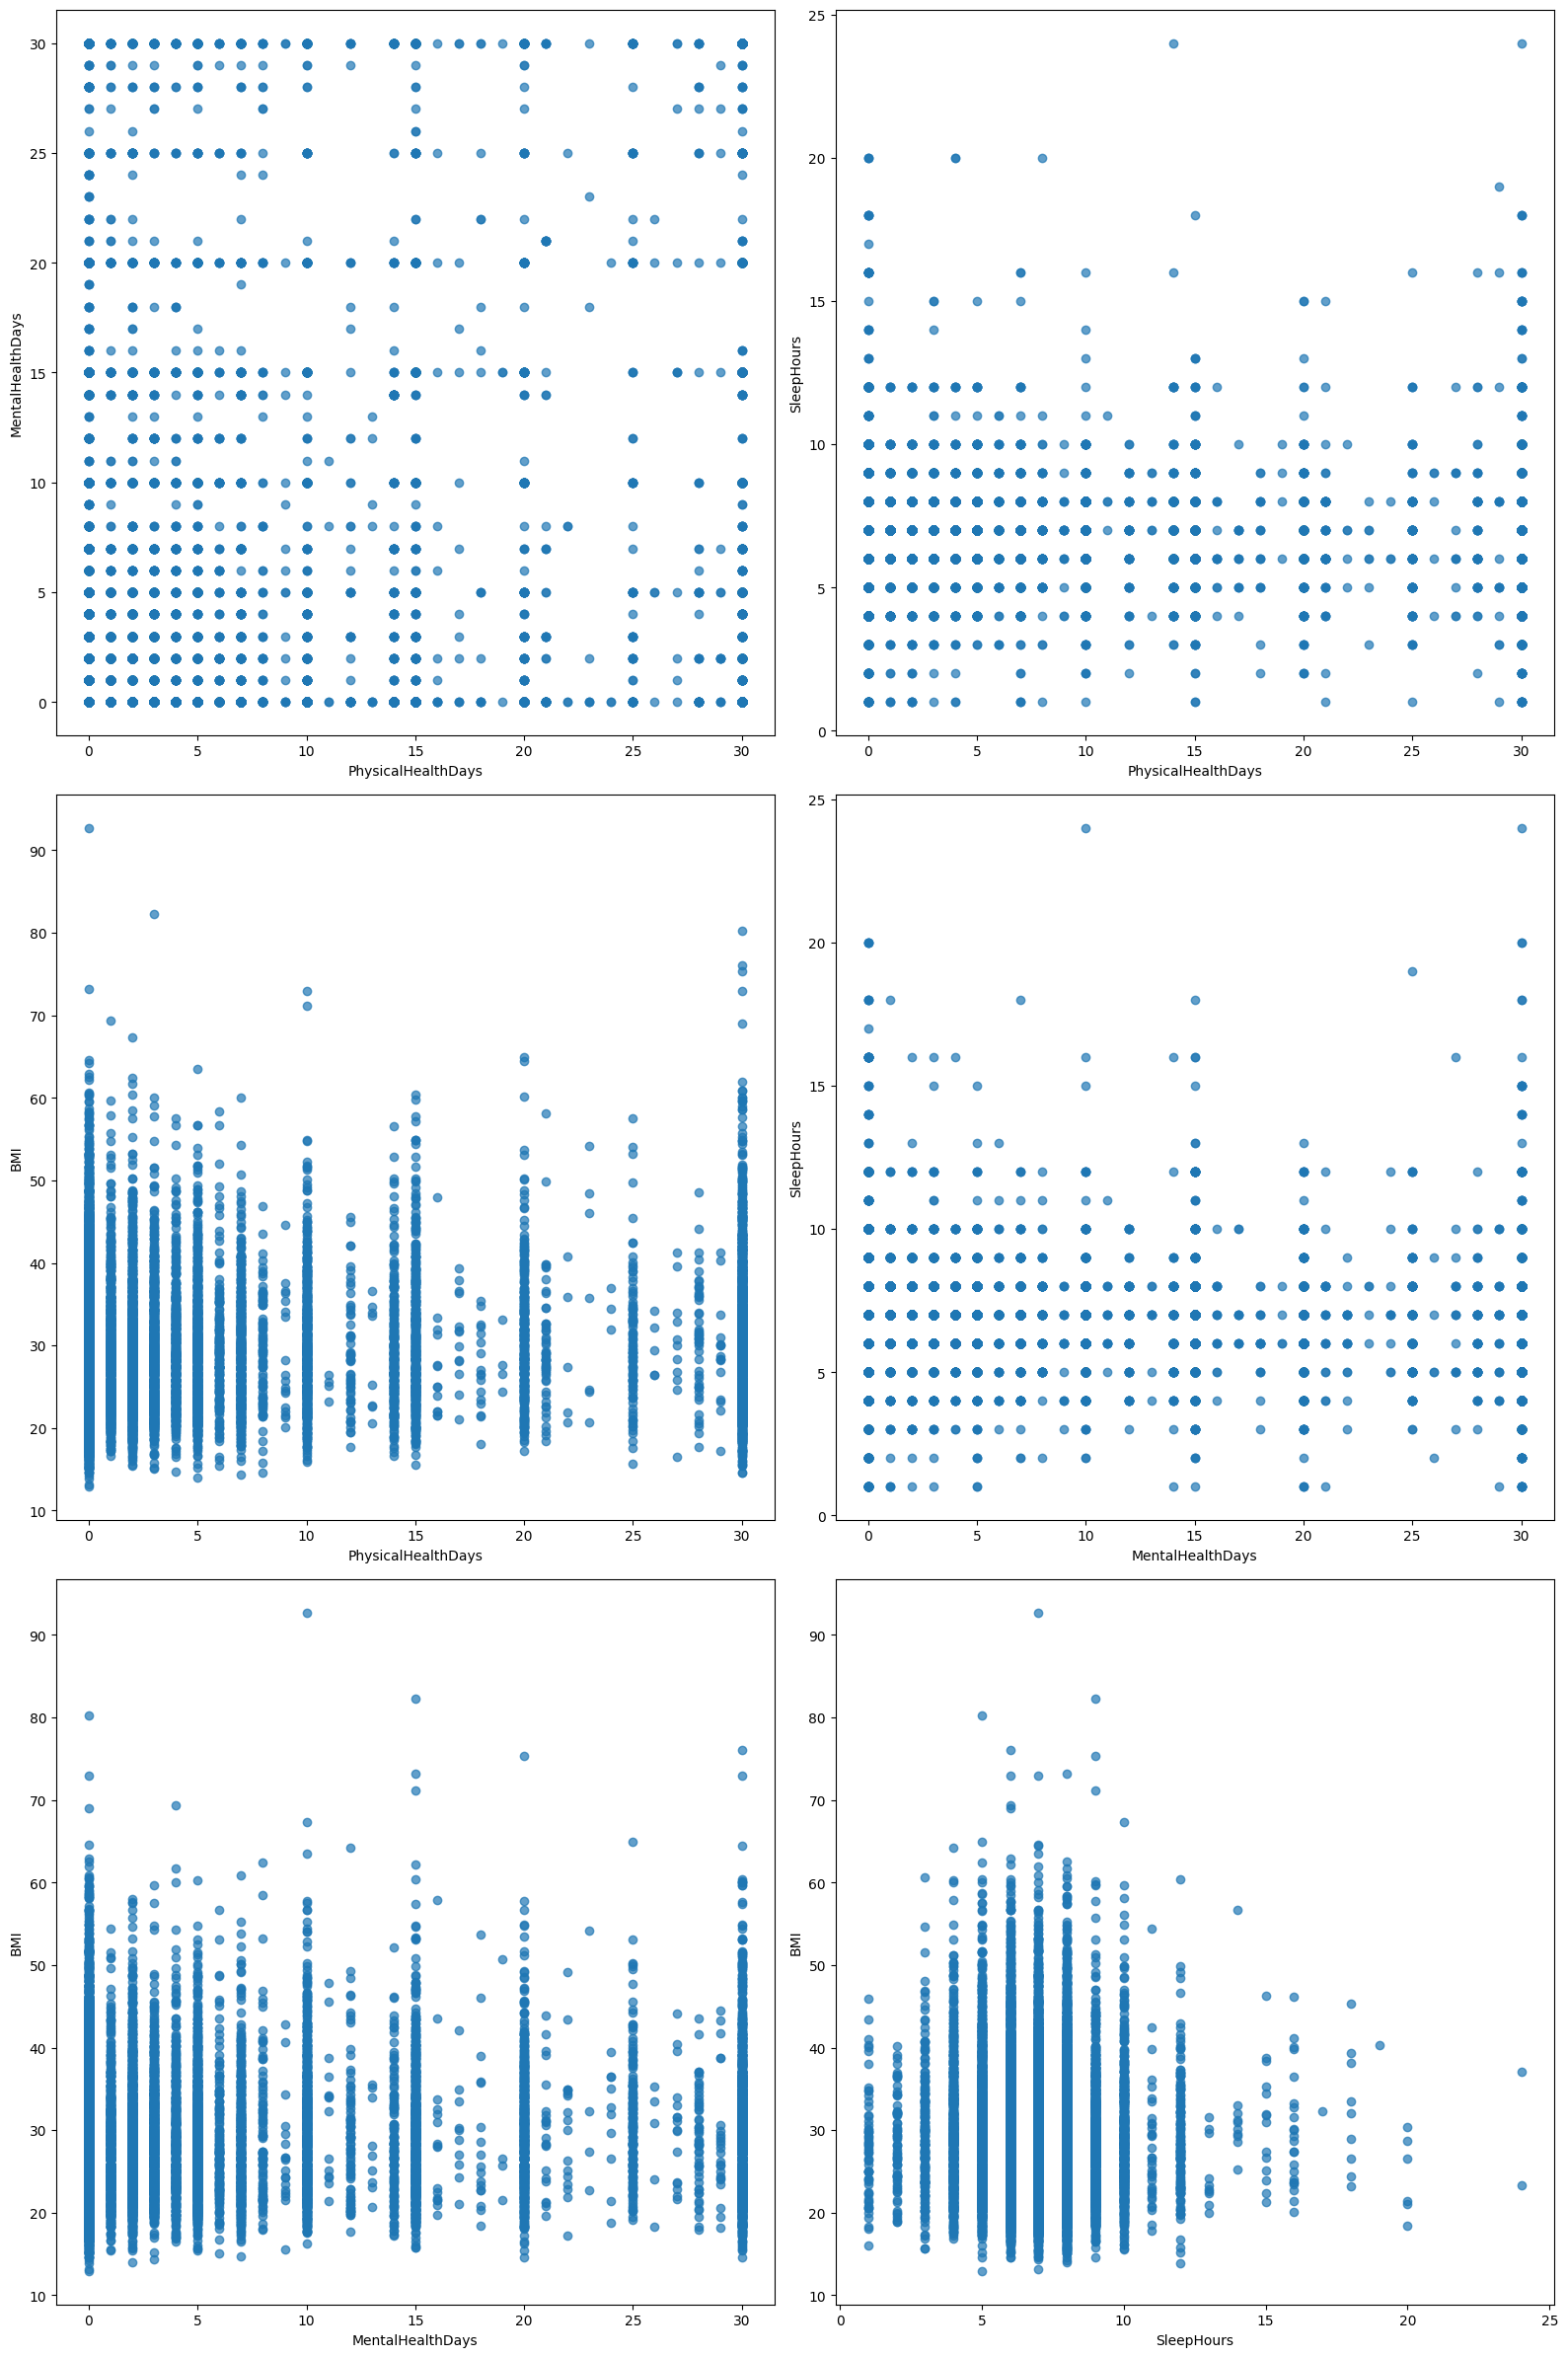

In [87]:
df_reduced = df[num_columns]

FRACTION = 0.1

df_reduced_sampled = df_reduced.sample(frac=FRACTION, random_state=RANDOM_STATE)


show_scatters_by_pairs(df_reduced_sampled, num_columns)

## Стандартизация данных для кластеризации

In [88]:
scaler = StandardScaler()
data_reduced_scaled = scaler.fit_transform(df_reduced_sampled)

df_scaled = pd.DataFrame(data_reduced_scaled, columns=df_reduced_sampled.columns)

### Иерархическая агломеративная кластеризация

In [89]:
import numpy as np
from sklearn import cluster
from scipy.cluster import hierarchy

def run_agglomerative(
    df: pd.DataFrame,
    num_clusters: int = 2
) -> cluster.AgglomerativeClustering:
    agglomerative = cluster.AgglomerativeClustering(
        n_clusters=num_clusters,
        compute_distances=True,
    )
    return agglomerative.fit(df)


def get_linkage_matrix(
        model: cluster.AgglomerativeClustering
    ) -> np.ndarray:
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    return np.column_stack([model.children_, model.distances_, counts]).astype(float)

def draw_dendrogram(linkage_matrix: np.ndarray):
    hierarchy.dendrogram(linkage_matrix, truncate_mode="level", p=3)
    plt.xticks(fontsize=10, rotation=45)
    plt.tight_layout()

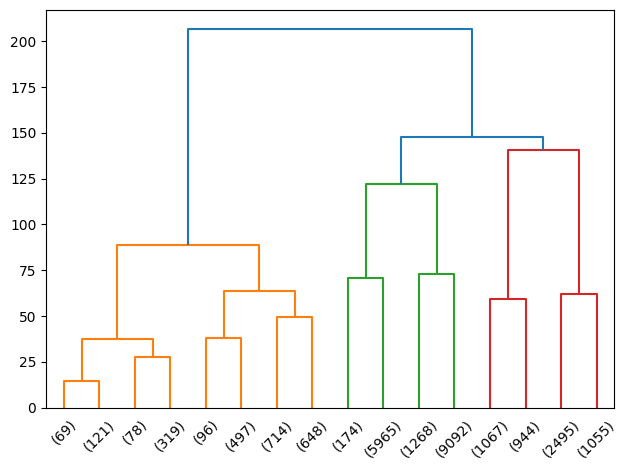

In [90]:
tree = run_agglomerative(df_scaled)
linkage_matrix = get_linkage_matrix(tree)
draw_dendrogram(linkage_matrix)

Пробуем представить данные в виде 3 больших кластеров и визуализируем результаты иерархической кластеризации

PhysicalHealthDays vs MentalHealthDays
PhysicalHealthDays vs SleepHours
PhysicalHealthDays vs BMI
MentalHealthDays vs SleepHours
MentalHealthDays vs BMI
SleepHours vs BMI


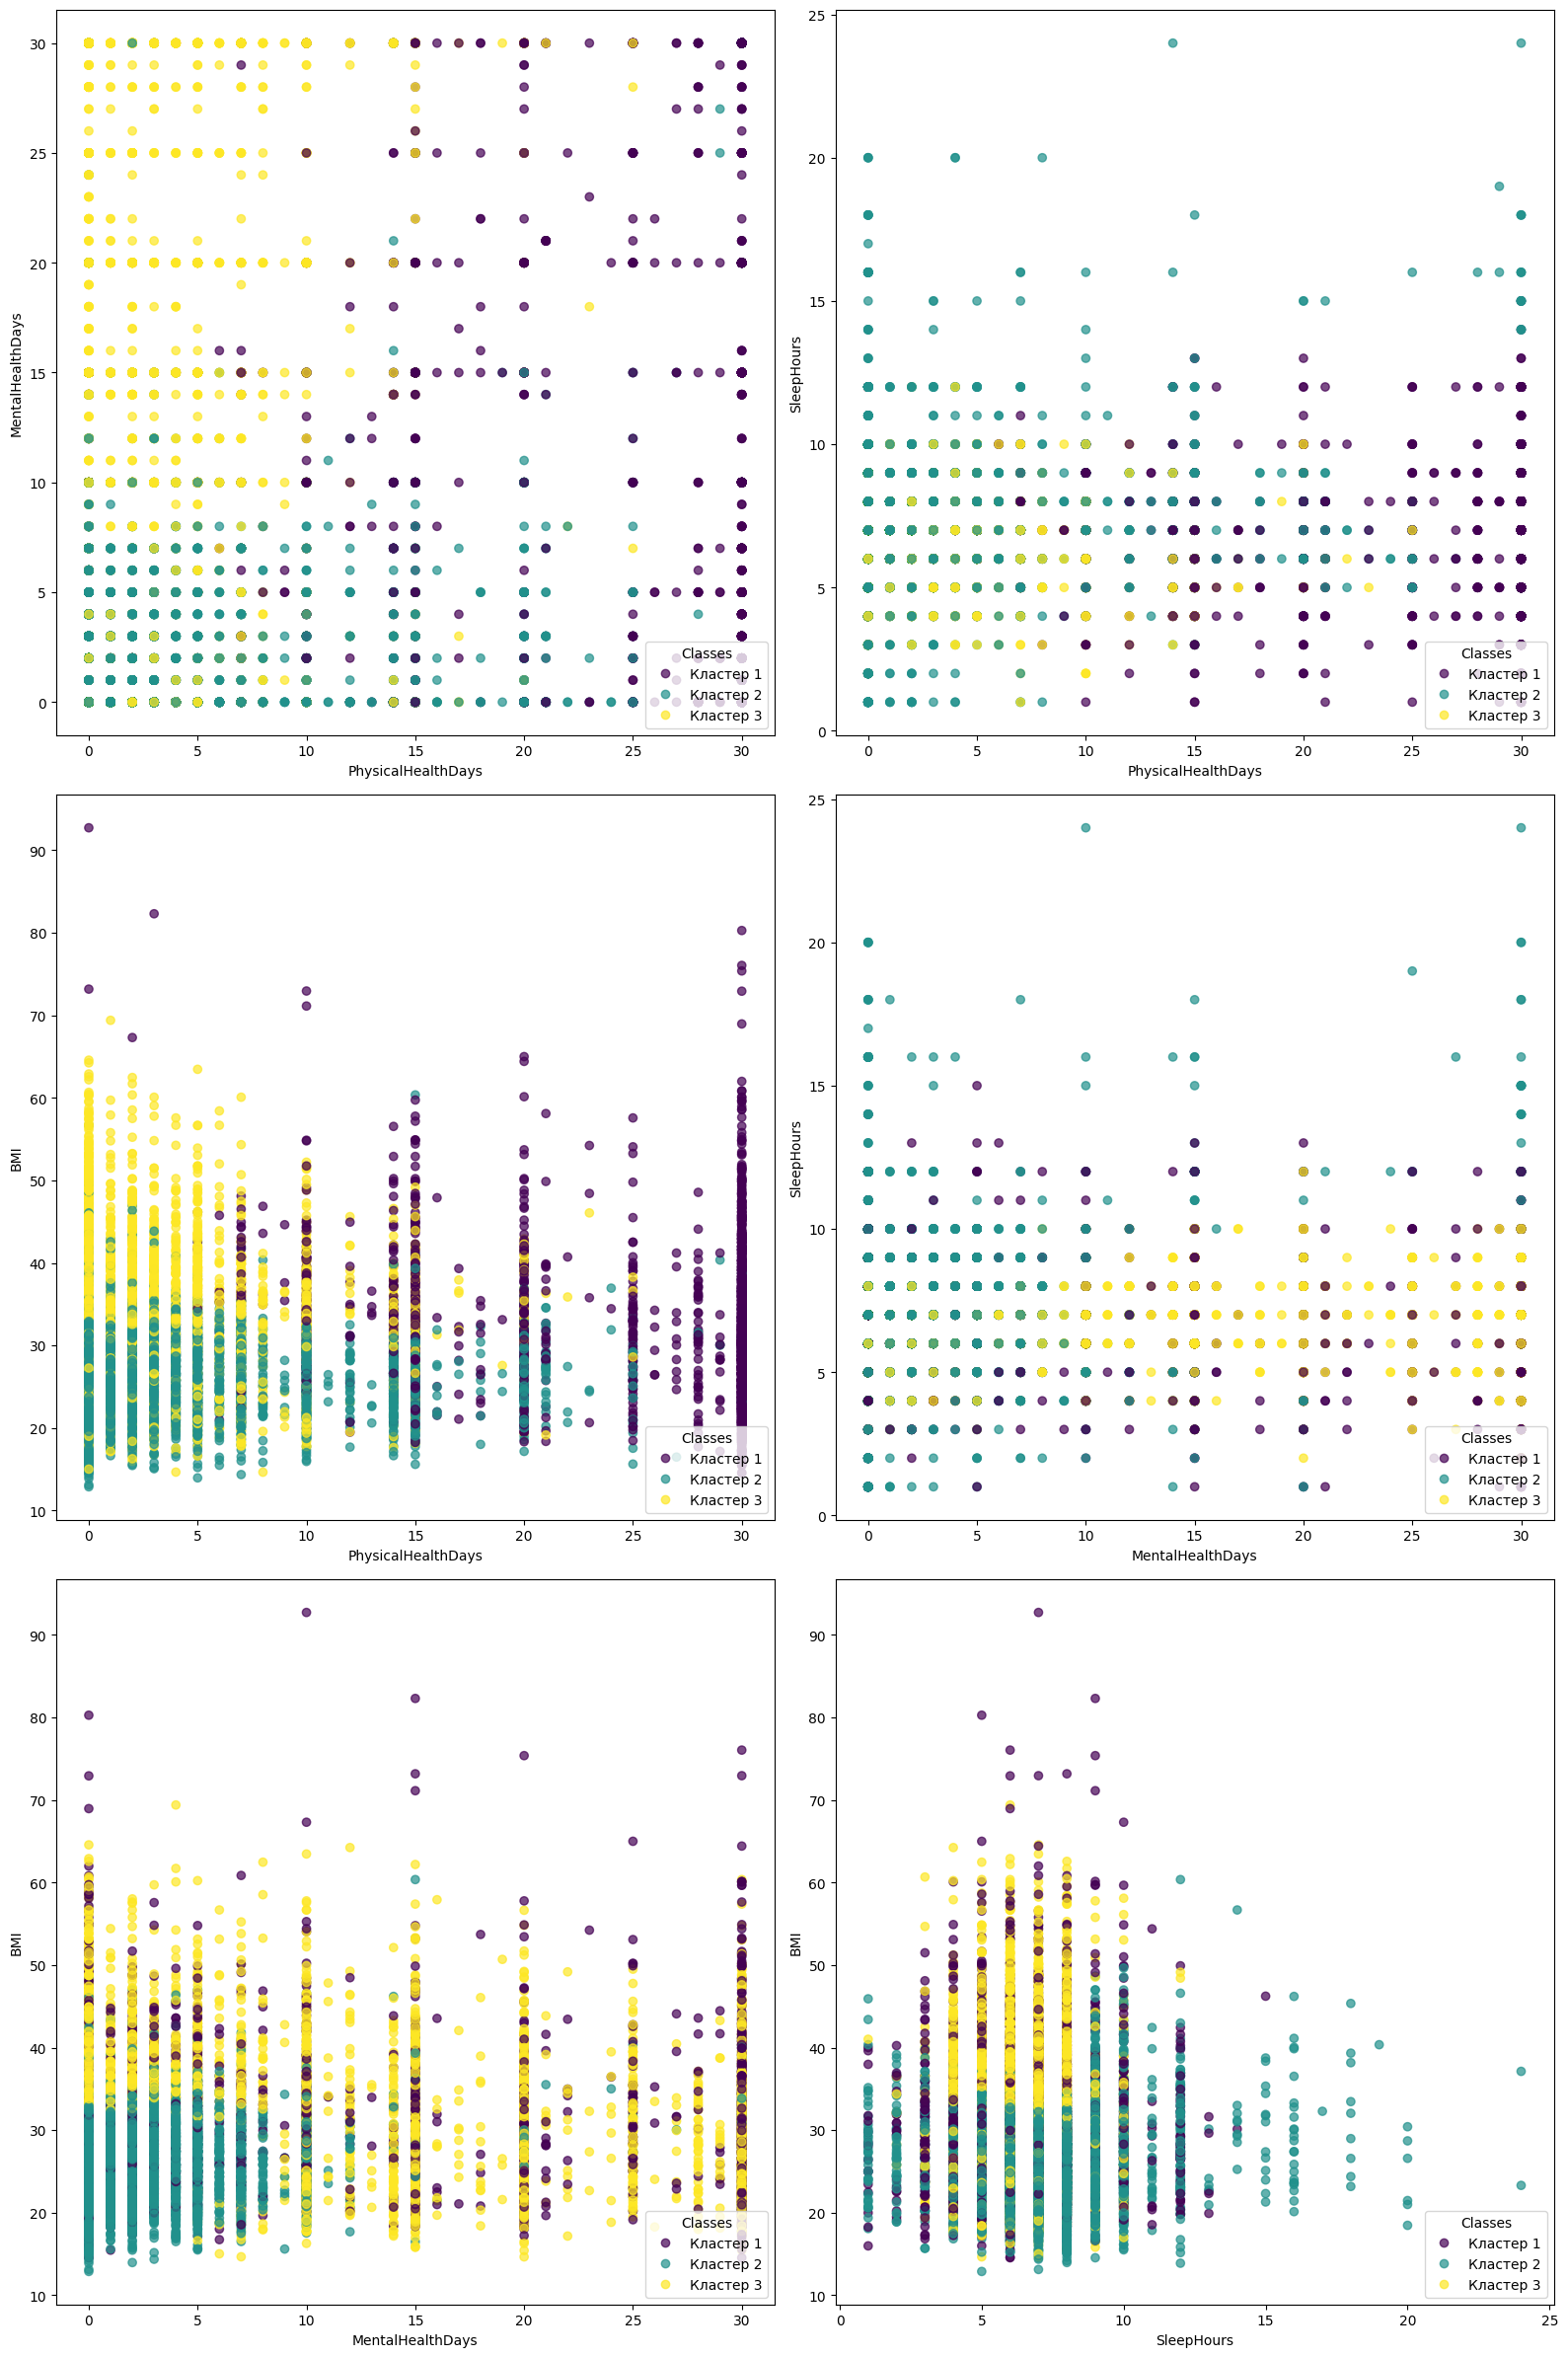

In [91]:
result = hierarchy.fcluster(linkage_matrix, 3, criterion="maxclust")
y_names = ['Кластер 1', 'Кластер 2', 'Кластер 3']

show_scatters_by_pairs(df_reduced_sampled, num_columns, result, y_names)

### KMeans (неиерархическая четкая кластеризация) для сравнения

In [92]:
from typing import Tuple
from sklearn.cluster import KMeans

def print_cluster_result(
    df: pd.DataFrame,
    clusters_num: int,
    labels: np.ndarray,
    separator: str = ", "):
    for cluster_id in range(clusters_num):
        cluster_indices = np.where(labels == cluster_id)[0]
        print(f"Cluster {cluster_id + 1} ({len(cluster_indices)}):")
        rules = [str(df.index[idx]) for idx in cluster_indices]
        print(separator.join(rules))
        print("")
        print("--------")


def run_kmeans(
    df: pd.DataFrame,
    num_clusters: int,
    random_state: int) -> Tuple[np.ndarray, np.ndarray]:
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    labels = kmeans.fit_predict(df)
    return labels, kmeans.cluster_centers_

In [93]:
labels, centers = run_kmeans(df_scaled, 3, RANDOM_STATE)
print_cluster_result(df_scaled, 3, labels)
display(centers)

Cluster 1 (6480):
5, 7, 14, 15, 18, 24, 27, 29, 38, 42, 46, 49, 51, 56, 57, 60, 62, 63, 66, 67, 68, 71, 76, 80, 85, 88, 90, 91, 95, 96, 97, 105, 109, 113, 117, 123, 136, 138, 139, 143, 146, 150, 151, 152, 154, 158, 166, 171, 175, 188, 190, 192, 193, 195, 203, 210, 214, 228, 230, 234, 244, 246, 248, 249, 254, 256, 261, 263, 272, 274, 276, 277, 278, 279, 283, 286, 287, 295, 297, 302, 307, 310, 311, 312, 316, 317, 318, 327, 333, 340, 345, 347, 348, 356, 357, 363, 370, 371, 373, 383, 386, 387, 392, 393, 394, 397, 400, 407, 411, 420, 422, 423, 425, 429, 434, 438, 443, 445, 452, 453, 455, 458, 459, 464, 469, 472, 477, 479, 482, 487, 492, 498, 502, 503, 505, 506, 507, 509, 511, 519, 521, 525, 527, 535, 541, 545, 555, 560, 567, 568, 572, 573, 574, 575, 579, 580, 582, 584, 586, 587, 588, 595, 600, 601, 603, 604, 610, 611, 613, 621, 623, 625, 626, 628, 633, 634, 635, 643, 647, 648, 652, 657, 658, 659, 660, 664, 667, 671, 675, 680, 681, 684, 685, 688, 692, 699, 703, 711, 713, 715, 719, 721, 724, 

array([[-0.26768418, -0.22724145, -0.33671544,  1.03735944],
       [-0.33771529, -0.31519476,  0.23113456, -0.5206252 ],
       [ 1.73265623,  1.57836843, -0.29417739,  0.18428677]])

Визуализируем результаты

In [94]:
def draw_cluster_results(
    df: pd.DataFrame,
    col1: int,
    col2: int,
    labels: np.ndarray,
    cluster_centers: np.ndarray,
    subplot: Any | None = None,
):
    ax = None
    if subplot is None:
        ax = plt
    else:
        ax = subplot

    centroids = cluster_centers
    u_labels = np.unique(labels)

    for i in u_labels:
        ax.scatter(
            df[labels == i][df.columns[col1]],
            df[labels == i][df.columns[col2]],
            label=i,
        )

    ax.scatter(centroids[:, col1], centroids[:, col2], s=80, color="k")



def show_clusters_by_pairs(
        df: DataFrame,
        columns: List[str],
        labels: Any = None,
        centers: Any = None) -> None:
    pairs_count = math.comb(len(columns), 2)
    plot_columns_count = 2
    plot_rows_count = math.ceil(pairs_count / plot_columns_count) 

    plt.figure(figsize=(plot_columns_count * 8, plot_rows_count * 8))

    count = 0
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            count += 1
            print(columns[i], 'vs', columns[j])
            draw_cluster_results(
                df,
                i, j,
                labels,
                centers, 
                plt.subplot(plot_rows_count, plot_columns_count, count))

    plt.tight_layout()
    plt.show()

PhysicalHealthDays vs MentalHealthDays
PhysicalHealthDays vs SleepHours
PhysicalHealthDays vs BMI
MentalHealthDays vs SleepHours
MentalHealthDays vs BMI
SleepHours vs BMI


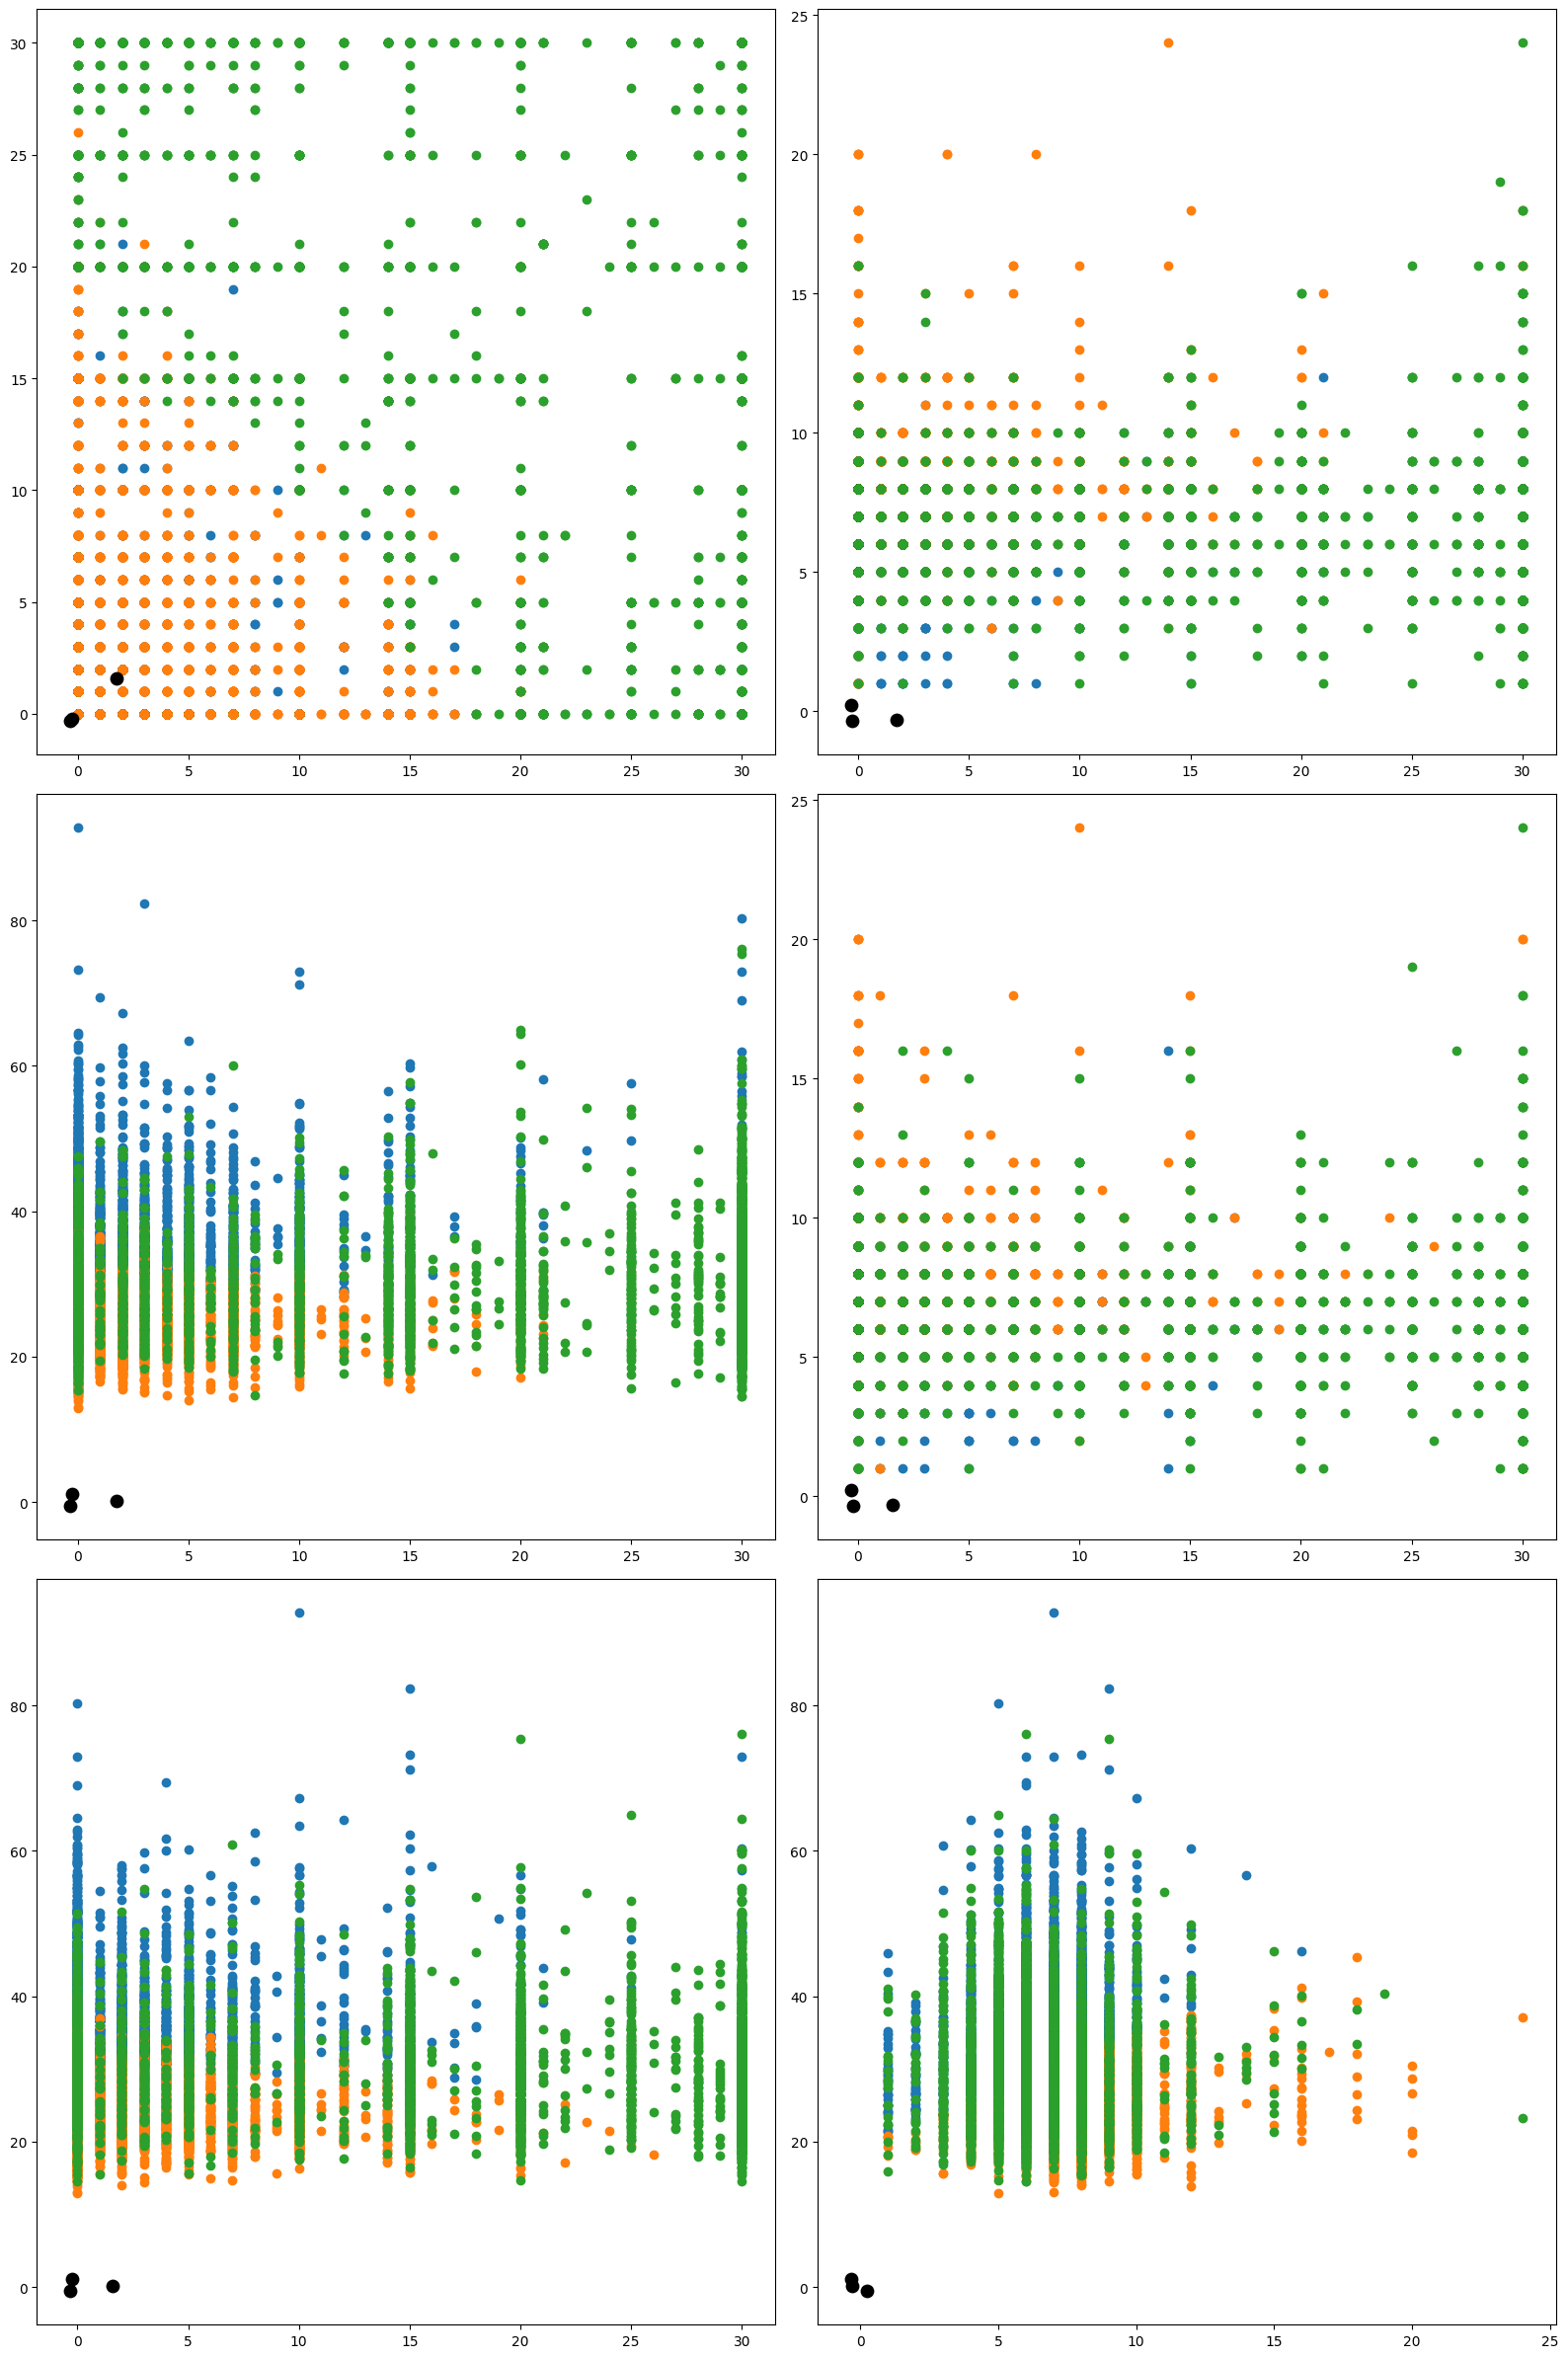

In [95]:
show_clusters_by_pairs(df_reduced_sampled, num_columns, labels, centers)

### РСА для визуализации сокращенной размерности

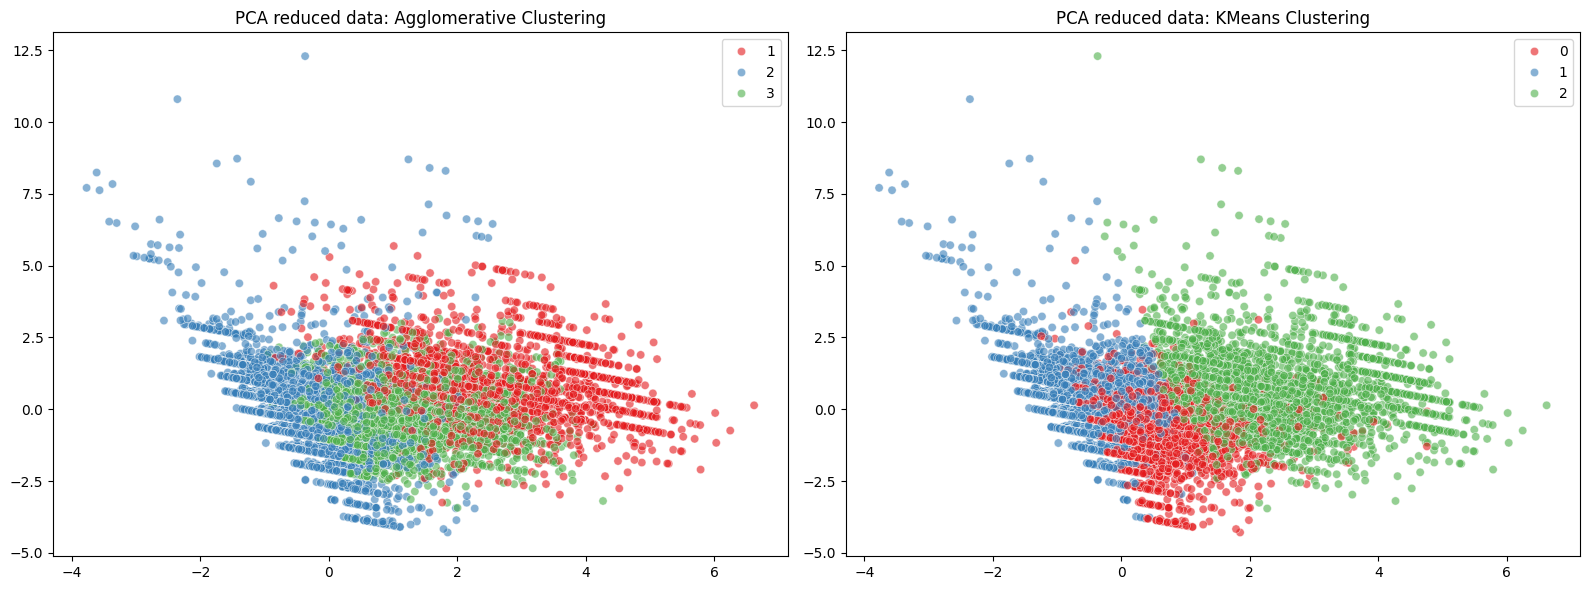

In [97]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data_reduced_scaled)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()

### Анализ инерции для метода локтя (метод оценки суммы квадратов расстояний)

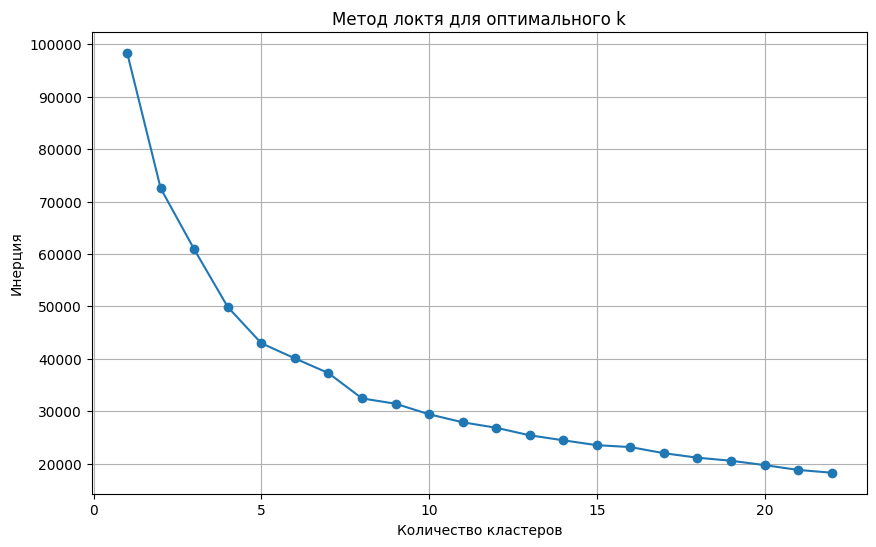

In [98]:
inertias = []
clusters_range = range(1, 23)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE)
    kmeans.fit(data_reduced_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

### Расчет коэффициентов силуета

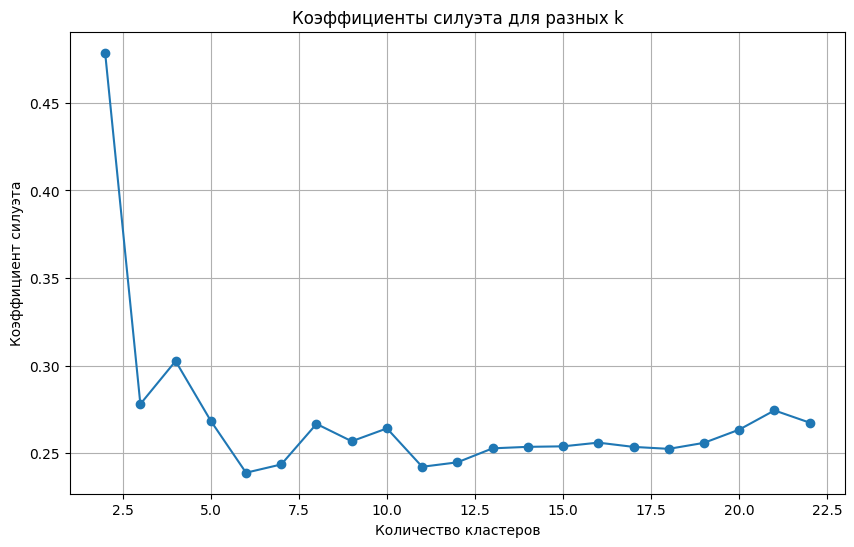

In [99]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(data_reduced_scaled)
    score = silhouette_score(data_reduced_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта: 0.282


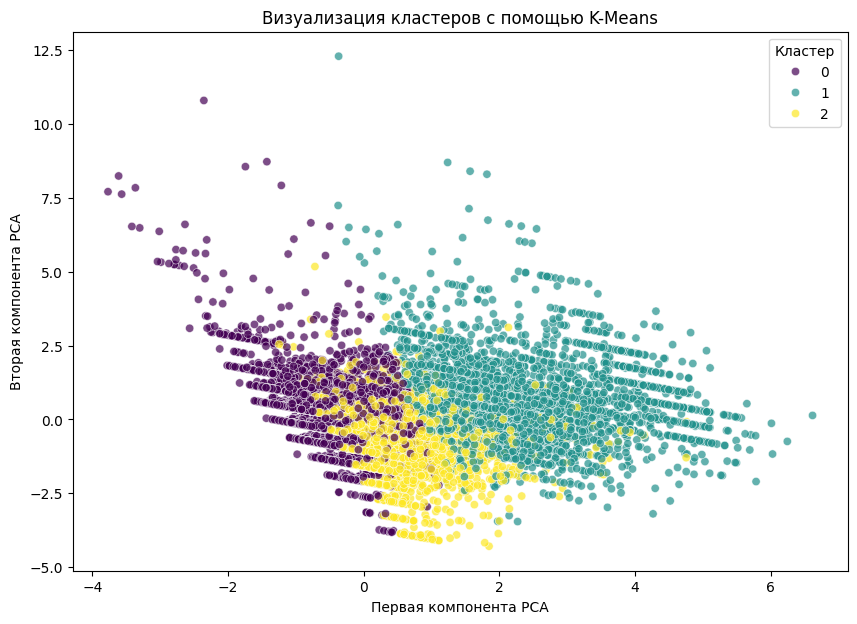

In [100]:
kmeans = KMeans(n_clusters=3, random_state=9)  
df_clusters = kmeans.fit_predict(data_reduced_scaled)

silhouette_avg = silhouette_score(data_reduced_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_reduced_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

Мы можем наблюдать некоторое пересечение кластеров, что говорит о неплохом результате работы метода кластеризации для данного датасета.